In [2]:
import dill, pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt

link_24_full_random = "render_logs/2024_random_training/"
link_24_full_prio = "render_logs/2024_full_prio_training/"
link_24_half_half = "render_logs/2024_half_half_training/"
link_17_full_random = "render_logs/2017_random_training/"
link_17_full_prio = "render_logs/2017_full_prio_training/"
link_17_half_half = "render_logs/2017_half_half_training/"

benchmark_2017 = "render_logs/benchmarks/2017_benchmark_no_training.pkl"
benchmark_2024 = "render_logs/benchmarks/2024_benchmark_no_training.pkl"

link_list = [link_24_full_random, link_24_full_prio, link_24_half_half, link_17_full_random, link_17_full_prio, link_17_half_half]


In [3]:
portfolio_evaluation_df = pd.DataFrame()

for link in link_list:
    
    directory = os.fsencode(link)
        
    for file in os.listdir(directory):
        
        filename = os.fsdecode(file)
        df = pd.read_pickle(link + filename)

        batch_size = filename.split("_")[2]
        train_every = filename.split("_")[5].split(".")[0]
        performance = (df.iloc[-1].portfolio_valuation/df.iloc[0].portfolio_valuation)*100-100

        portfolio_evaluation_df[f"{link[12:21]}_{filename}"] = [link[12:21], f"{batch_size}_{train_every}", performance]  

# convert all columns of DataFrame
portfolio_evaluation_df = portfolio_evaluation_df.transpose()
portfolio_evaluation_df = portfolio_evaluation_df.apply(pd.to_numeric, errors='ignore') # convert all columns of DataFrame
portfolio_evaluation_df.columns = ["mode", "batch_size_train_every","performance"]


/tmp/ipykernel_1047/3174437022.py:20: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  portfolio_evaluation_df = portfolio_evaluation_df.apply(pd.to_numeric, errors='ignore') # convert all columns of DataFrame


In [4]:
benchmark_2017_df = pd.read_pickle(benchmark_2017)
benchmark_2017_performance = (benchmark_2017_df.iloc[-1].portfolio_valuation/benchmark_2017_df.iloc[0].portfolio_valuation)*100-100
buy_and_hold_2017 = (benchmark_2017_df.iloc[-1].close / benchmark_2017_df.iloc[0].open)*100-100

In [5]:
benchmark_2024_df = pd.read_pickle(benchmark_2024)
benchmark_2024_performance = (benchmark_2024_df.iloc[-1].portfolio_valuation/benchmark_2024_df.iloc[0].portfolio_valuation)*100-100
buy_and_hold_2024 = (benchmark_2024_df.iloc[-1].close / benchmark_2024_df.iloc[0].open)*100-100

In [6]:
# filtering out the worst ones, to unclutter the plot
portfolio_evaluation_df.groupby("batch_size_train_every").sum().sort_values("performance")

,mode,performance
batch_size_train_every,,
256_256,2024_rand2024_full2024_half2017_rand2017_half,423.053709
64_64,2024_rand2024_full2024_half2017_rand2017_full2...,458.646555
256_64,2024_rand2024_full2024_half2017_rand2017_full2...,480.685248
128_256,2024_rand2024_full2024_half2017_rand2017_full2...,503.217807
256_128,2024_rand2024_full2024_half2017_rand2017_full2...,520.399208
64_128,2024_rand2024_full2024_half2017_rand2017_full2...,534.888936
128_128,2024_rand2024_full2024_half2017_rand2017_full2...,561.722563
64_256,2024_rand2024_full2024_half2017_rand2017_full2...,587.152378
128_64,2024_rand2024_full2024_half2017_rand2017_full2...,589.825159


In [7]:
portfolio_evaluation_df.columns = ['mode', 'Batch Size_Train every', 'Performance (%)']

portfolio_evaluation_df['Batch Size_Train every'] = portfolio_evaluation_df['Batch Size_Train every'].replace('_',' / ', regex=True)

/tmp/ipykernel_1047/1810677717.py:14: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  g = sns.catplot(portfolio_evaluation_df[portfolio_evaluation_df['mode'].str.startswith("2024")], y="Performance (%)", x="Sampling", hue="Batch Size_Train every", s=100, palette=sns.color_palette("muted"), lw=0.5).set(title='Validation set 1 (01.01.2024 - 15.05.2024)')


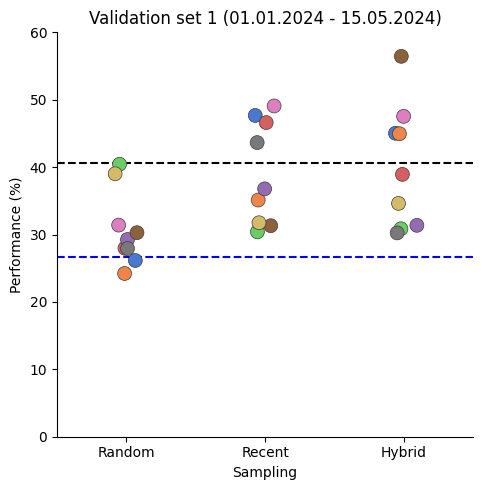

/tmp/ipykernel_1047/1810677717.py:24: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  g = sns.catplot(portfolio_evaluation_df[portfolio_evaluation_df['mode'].str.startswith("2017")], y="Performance (%)", x="Sampling", hue="Batch Size_Train every", s=100, palette=sns.color_palette("muted"), lw=0.5).set(title='Validation set 2 (30.11.2017 - 30.11.2018)')


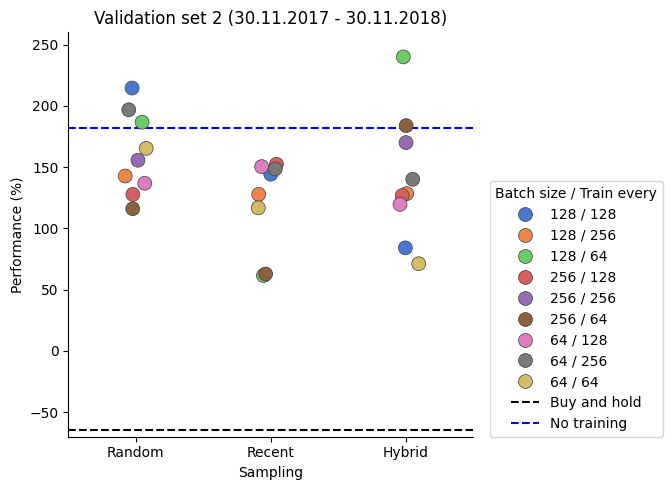

In [8]:
# Mapping of old mode labels to new mode labels
mode_mapping = {
    '2024_rand': 'Random',
    '2024_full': 'Recent',
    '2024_half': 'Hybrid',
    '2017_rand': 'Random',
    '2017_full': 'Recent',
    '2017_half': 'Hybrid'
}

# Update the mode column in the DataFrame
portfolio_evaluation_df['Sampling'] = portfolio_evaluation_df['mode'].map(mode_mapping)

g = sns.catplot(portfolio_evaluation_df[portfolio_evaluation_df['mode'].str.startswith("2024")], y="Performance (%)", x="Sampling", hue="Batch Size_Train every", s=100, palette=sns.color_palette("muted"), lw=0.5).set(title='Validation set 1 (01.01.2024 - 15.05.2024)')

g.map(plt.axhline, y=buy_and_hold_2024, ls='--', c='k', label='Buy and hold', lw=1.5)
g.map(plt.axhline, y=benchmark_2024_performance, ls='--', c='b', label='No training', lw=1.5)
g._legend.remove()

plt.ylim(0, 60)
plt.show()


g = sns.catplot(portfolio_evaluation_df[portfolio_evaluation_df['mode'].str.startswith("2017")], y="Performance (%)", x="Sampling", hue="Batch Size_Train every", s=100, palette=sns.color_palette("muted"), lw=0.5).set(title='Validation set 2 (30.11.2017 - 30.11.2018)')

g.map(plt.axhline, y=buy_and_hold_2017, ls='--', c='k', label='Buy and hold', lw=1.5)
g.map(plt.axhline, y=benchmark_2017_performance, ls='--', c='b', label='No training', lw=1.5)


g._legend.remove()

plt.ylim(-70, 260)
plt.legend(loc=(1.04, 0), title='Batch size / Train every')
plt.show()

In [9]:
link_24 = "render_logs/2024_256_64_half/"
link_17 = "render_logs/2017_256_64_half/"

link_list = [link_24, link_17]

scatter_performance_df = pd.DataFrame()

for link in link_list:
    
    directory = os.fsencode(link)
        
    for file in os.listdir(directory):
        
        filename = os.fsdecode(file)
        df = pd.read_pickle(link + filename)

        year = link[12:16]
        performance = (df.iloc[-1].portfolio_valuation/df.iloc[0].portfolio_valuation)*100-100

        scatter_performance_df[f"{filename}"] = [year, performance]

# convert all columns of DataFrame
scatter_performance_df = scatter_performance_df.transpose()
scatter_performance_df = scatter_performance_df.apply(pd.to_numeric, errors='ignore') # convert all columns of DataFrame
scatter_performance_df.columns = ["year", "performance"]

/tmp/ipykernel_1047/4248712833.py:24: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  scatter_performance_df = scatter_performance_df.apply(pd.to_numeric, errors='ignore') # convert all columns of DataFrame


In [10]:
scatter_performance_df[scatter_performance_df['year']==2024].median()

year           2024.000000
performance      41.457277
dtype: float64

In [11]:
scatter_performance_df[scatter_performance_df['year']==2017].performance.median()

196.86168916828183

/tmp/ipykernel_1047/2169442754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(scatter_performance_df[scatter_performance_df['Year']==2017], y="Performance (%)", x="Year", palette=["orange"], widths=[0.4]).set(title='Validation set 2')


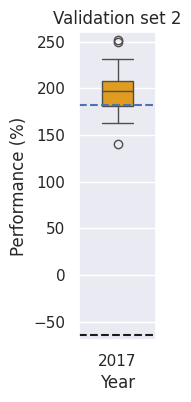

/tmp/ipykernel_1047/2169442754.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(scatter_performance_df[scatter_performance_df['Year']==2024], y="Performance (%)", x="Year", palette=["orange"], widths=[0.4]).set(title='Validation set 1')


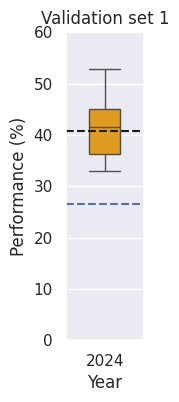

In [33]:
scatter_performance_df.columns = ["Year", "Performance (%)"]

sns.set_theme(rc={'figure.figsize':(1,4)})

sns.boxplot(scatter_performance_df[scatter_performance_df['Year']==2017], y="Performance (%)", x="Year", palette=["orange"], widths=[0.4]).set(title='Validation set 2')

plt.axhline(y=buy_and_hold_2017, ls='--', c='k', label='BTC', lw=1.5)
plt.axhline(y=benchmark_2017_performance, ls='--', c='b', label='no training', lw=1.5)

plt.ylim(-70, 260)

plt.show()


sns.set_theme(rc={'figure.figsize':(1,4)})

sns.boxplot(scatter_performance_df[scatter_performance_df['Year']==2024], y="Performance (%)", x="Year", palette=["orange"], widths=[0.4]).set(title='Validation set 1')


plt.axhline(y=buy_and_hold_2024, ls='--', c='k', label='BTC', lw=1.5)
plt.axhline(y=benchmark_2024_performance, ls='--', c='b', label='no training', lw=1.5)

plt.ylim(0, 60)

plt.show()


In [34]:
benchmark_2017_performance

181.97933495808314

In [13]:
scatter_performance_df[scatter_performance_df.performance==scatter_performance_df[scatter_performance_df['year']==2017].performance.median()]

,year,performance
Stock_2024-06-05_01-47-10.pkl,2017,196.861689


In [14]:
scatter_performance_df[scatter_performance_df.performance==scatter_performance_df[scatter_performance_df['year']==2024].performance.median()]

,year,performance
Stock_2024-06-05_00-51-41.pkl,2024,41.457277


In [15]:
sample_2024_df = pd.read_pickle('render_logs/2024_256_64_half/Stock_2024-06-05_00-51-41.pkl')

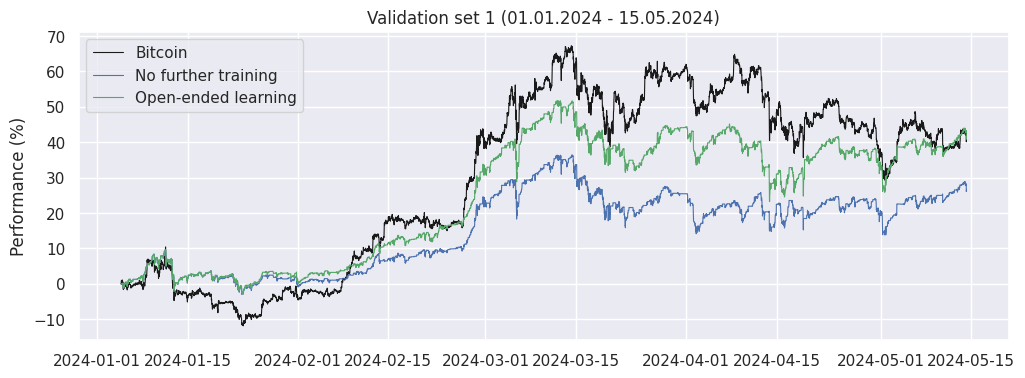

In [58]:
sns.set_theme(rc={'figure.figsize':(12,4)})
sns.lineplot(data=benchmark_2024_df.close / benchmark_2024_df.iloc[0].close * 100-100, color="k", lw=0.8, label="Bitcoin").set(title='Validation set 1 (01.01.2024 - 15.05.2024)')
sns.lineplot(data=benchmark_2024_df.portfolio_valuation / 10-100, color="b", lw=0.8, label="No further training")
g = sns.lineplot(data=sample_2024_df.portfolio_valuation / 10-100, color="g", lw=0.8, label="Open-ended learning")

g.set(ylabel='Performance (%)')
plt.legend()
fig = g.get_figure()
fig.savefig("v1 Lineplot.png") 

In [17]:
sample_2017_df = pd.read_pickle('render_logs/2017_256_64_half/Stock_2024-06-05_01-47-10.pkl')

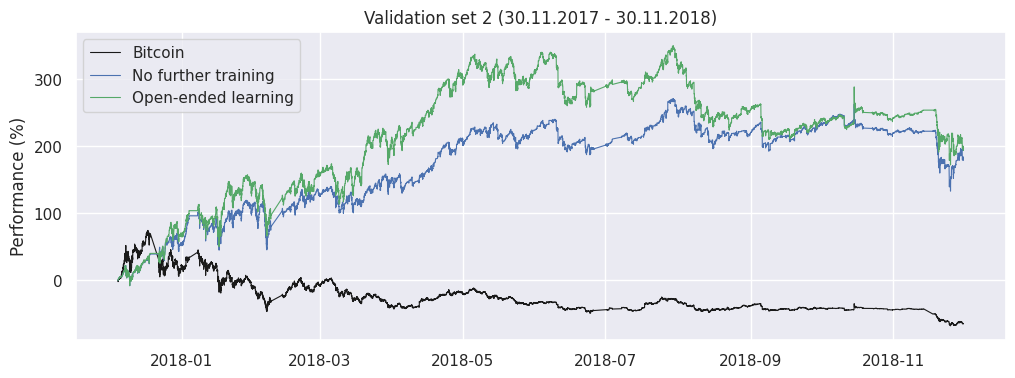

In [59]:
sns.set_theme(rc={'figure.figsize':(12,4)})
sns.lineplot(data=benchmark_2017_df.close / benchmark_2017_df.iloc[0].close * 100-100, color="k", lw=0.8, label="Bitcoin").set(title='Validation set 2 (30.11.2017 - 30.11.2018)')
sns.lineplot(data=benchmark_2017_df.portfolio_valuation / 10-100, color="b", lw=0.8, label="No further training")
g = sns.lineplot(data=sample_2017_df.portfolio_valuation / 10-100, color="g", lw=0.8, label="Open-ended learning")

g.set(ylabel='Performance (%)')

fig = g.get_figure()
fig.savefig("v2 Lineplot.png") 